## Text Analysis



importing necessary packages

In [791]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.snowball import SnowballStemmer
try:
    from nltk.corpus import stopwords
except:
    import sys
    !conda install --yes --prefix {sys.prefix} nltk

Reading in the thesis file that I saved in as a .txt file for only including the text.

In [547]:
thesis = open('thesis.txt','r',encoding='utf-8').read().replace('\n',' ')

Word count of my thesis

In [548]:
len(thesis.split(" "))

30982

Character count of my thesis

In [549]:
len(thesis)

196984

Removing stopwords, spaces and other irrelevant things. Also removing the et al that I used frequently for citing multuple authors. Using the stopwords from NLTK, which is a basic NLP library in python.

In [550]:
thesis = thesis.replace('et al.,','')

In [551]:
stop = stopwords.words('english')

In [552]:
output=[]
for word in thesis.split(" "):
    if len(word) != 1 | len(word) != 0 or word != '' or word != " ":
        
        if word.lower() not in stop and word != '&':         
            output.append(word.strip().lower())

In [553]:
len(output)

20686

Doing some visual analysis for further cleaning the words.

In [554]:
output

['\ufeffuniversity',
 'calgary',
 '',
 '',
 'dynamics',
 'neural',
 'responses',
 'mouse',
 'auditory',
 'cortex:',
 'construction',
 'characterization',
 '3d',
 'receptive',
 'fields',
 'frequency,',
 'intensity',
 'time',
 'domains',
 '',
 '',
 'farhad',
 'ahmad',
 'qureshi',
 '',
 '',
 'thesis',
 'submitted',
 'faculty',
 'graduate',
 'studies',
 'partial',
 'fulfilment',
 'requirements',
 'degree',
 'master',
 'science',
 '',
 'graduate',
 'program',
 'medical',
 'science',
 '',
 'calgary,',
 'alberta',
 '',
 'december,',
 '2018',
 '',
 '©',
 'farhad',
 'ahmad',
 'qureshi',
 '2018',
 '',
 'abstract',
 'keywords:',
 '',
 '3d',
 'rendering,',
 'image',
 'processing,',
 'brain',
 'signal',
 'processing,',
 'vtk,',
 'auditory',
 'cortex,',
 'hearing',
 'research,',
 'spectro-temporal',
 'receptive',
 'fields,',
 'frequency',
 'tuning',
 '',
 'neurons',
 'central',
 'auditory',
 'system',
 'exhibit',
 'non-linear',
 'responses',
 'acoustic',
 'stimulation.',
 'nonlinearities',
 'usually

The following data quality issues will be corrected.

### Quality:

* Remove .\t
* Remove \ufeff
* Remove punctuations
* Remove digits
* Remove ..
* Remove ( )

Creating a copy of the list to perform all the cleaning.

In [845]:
output_copy = output.copy()

In [846]:
output_copy[0] = 'university' # Since the first word had some unicode syntax so removing it.


Performing all the other cleaning steps highlighted in the quality issues.

In [847]:
for i in range(0,len(output_copy)):
    Loc=output_copy[i].find("\t")
    output_copy[i] = output_copy[i].replace(output[i][Loc:-1],'')
    output_copy[i] = output_copy[i].replace('.','')
    output_copy[i] = output_copy[i].replace('(','')
    output_copy[i] = output_copy[i].replace(')','')
    output_copy[i] = output_copy[i].replace(',','')
    output_copy[i] = output_copy[i].replace('-','')
    output_copy[i] = output_copy[i].replace(':','')
    

Removing all the empty elements in the list after cleaning

Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use SnowballStemmer from the NLTK library.

In [848]:
stemmer = SnowballStemmer("english")

In [849]:
final = []
for w in output_copy:
    final.append(stemmer.stem(w))
    

In [850]:
final = filter(None, final) # fastest

In [851]:
counts = dict(Counter(final).most_common(20))

In [852]:
counts

{'frequenc': 347,
 'auditori': 325,
 'neuron': 318,
 'respons': 306,
 'sound': 229,
 'intens': 228,
 'use': 193,
 'figur': 179,
 'istrf': 149,
 'stimulus': 146,
 'time': 143,
 'process': 137,
 'level': 136,
 'show': 123,
 'neural': 116,
 'inform': 114,
 'tune': 112,
 'differ': 112,
 'strf': 96,
 'tone': 95}

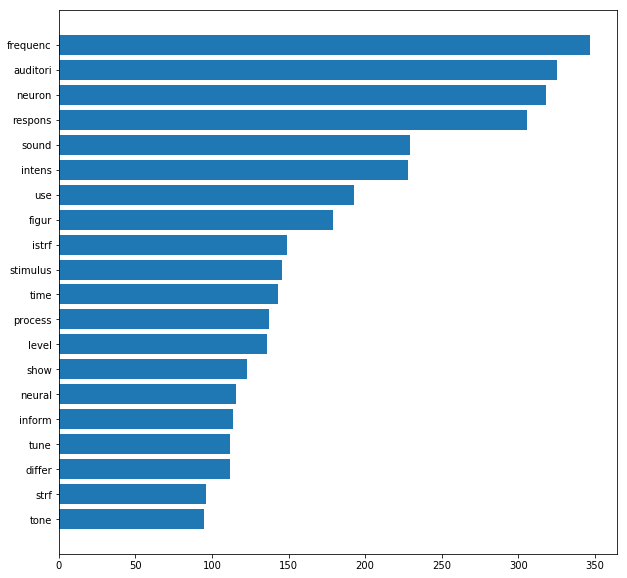

In [853]:
labels, values = zip(*counts.items())
plt.figure(figsize=(10,10))
plt.barh(labels,values)
plt.gca().invert_yaxis()
